<a href="https://colab.research.google.com/github/phnss/ITI---Projeto-01/blob/main/ITI1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from timeit import default_timer as timer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

filepath = lambda p :'/content/drive/MyDrive/ITI/'+p

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
f = open(filepath("test.txt"))
print(f.read())
f.close()

eihroaeihdras



In [ ]:
from ctypes import *

!cc -fPIC -shared -o /content/drive/MyDrive/ITI/bitsave.so /content/drive/MyDrive/ITI/testebits_salva.c
save_functions = CDLL(filepath('bitsave.so'))

In [102]:
#create the dictionary
def dict_init():
  return {chr(i): i for i in range(256)}

In [112]:
def compress(f, tam_lim):
  buffer = ""
  dictionary = dict_init()
  code = []

  while True:
    data = f.read()
    if not data: break
    for byte in data:
      byte = chr(byte)
      wc = buffer + byte
      if wc in dictionary:
        buffer = wc
      else:
        code.append(dictionary[buffer])
        if len(dictionary) < tam_lim:
          dictionary[wc] = len(dictionary)
        buffer = byte

  if buffer:
    code.append(dictionary[buffer])

  if len(dictionary) == tam_lim: print("HIT SIZE LIMIT")
  return code

In [113]:
def decompress(code):
  from io import StringIO

  msg = bytearray()

  dictionary = {i: chr(i) for i in range(256)}
  w = chr(code.pop(0))
  msg += (bytearray(w, "utf-8"))
  for c in code:
    if c in dictionary:
      entry = dictionary[c]
    elif c == len(dictionary):
      entry = w + w[0]
    else:
      raise ValueError('error decompressing')
    msg += (bytearray(entry, "utf-8"))
    dictionary[len(dictionary)] = w + entry[0]
    w = entry
  
  return msg

In [114]:
class header:
  size = 0
  def __init__(self, k):
    self.k = k
    self.dictionary = [chr(i) for i in range(256)]

  def __build(self):
    save_functions.resetFP(None)

    self.k = save_functions.getBits(8)
    self.size = save_functions.getBits(32)
    self.dictionary = [None] * self.size
    
  def __toFile(self, size):
    save_functions.addBits(self.k, 8)
    save_functions.addBits(size, 32)

  def save(self, body):
    self.__toFile(len(body))
    for a in body:
      save_functions.addBits(a, self.k)
    save_functions.salvaFim()

  def read(self):
    self.__build()
    for i in range(self.size):
      self.dictionary[i] = (save_functions.getBits(self.k))

    #print(self.dictionary)
    return self.dictionary

In [115]:
def compressRoutine(f, filename, ext, size, crs):

  times = [None] * 8

  for k in range(9, 17):
    print(f"k:{k}\tcompressing...")
    save_functions.init()
    f.seek(0,0)
    h = header(k)

    start_t = timer()
    h.save(compress(f, 2**k))
    end_t = timer()
    print(f"start = {start_t}, end = {end_t}, diff = {end_t-start_t}")
    times[k-9] = (end_t-start_t)
    sz = (save_functions.resetFP(None)-2)
    print(f"og = {size}, sz = {sz}, ratio = {size/sz}")
    crs[k-9] = (size/sz)

    print("decompressing...")
    fw = open(f"{filename}_decomp_k={k}.{ext}", "wb")
    fw.write(decompress(h.read()))
    fw.close()
  
  return times

In [125]:
file_path = filepath("corpus16MB.txt")
og_size = os.stat(file_path).st_size
print(f"og = {og_size}")
txt_RCs = [None] * 8

tamArqCompr = []

f = open(file_path, "rb")
txt_elapsed_time = compressRoutine(f, "corpus", "txt", og_size, txt_RCs)

print("CORPUS:")
for i in range(7):
  print(f"k = {i} \telapsed time: {txt_elapsed_time[i]}s\tRC: {txt_RCs[i]}")
  
f.close()

og = 15637149
k:9	compressing...
HIT SIZE LIMIT
start = 21790.311044257, end = 21800.687679462, diff = 10.376635205000639
og = 15637149, sz = 10192510, ratio = 1.5341803932495528
decompressing...
k:10	compressing...
HIT SIZE LIMIT
start = 21814.96915725, end = 21823.933212434, diff = 8.964055183998425
og = 15637149, sz = 9182310, ratio = 1.7029646134796146
decompressing...
k:11	compressing...
HIT SIZE LIMIT
start = 21833.107548632, end = 21841.252673216, diff = 8.14512458399986
og = 15637149, sz = 8432722, ratio = 1.8543418127622373
decompressing...
k:12	compressing...
HIT SIZE LIMIT
start = 21849.101604416, end = 21856.923617588, diff = 7.822013172000879
og = 15637149, sz = 7998777, ratio = 1.9549424868326746
decompressing...
k:13	compressing...
HIT SIZE LIMIT
start = 21863.849027311, end = 21873.524513673, diff = 9.675486362000811
og = 15637149, sz = 7647525, ratio = 2.0447332960663744
decompressing...
k:14	compressing...
HIT SIZE LIMIT
start = 21879.989001971, end = 21887.755289761,

In [ ]:
file_path = filepath("disco.mp4")
og_size = os.stat(file_path).st_size
print(f"og = {og_size}")
vid_RCs = [None] * 8

f = open(file_path, "rb")
vid_elapsed_time = compressRoutine(f, "disco", "mp4", og_size, vid_RCs)

print("VIDEO:")
for i in range(7):
  print(f"k = {i} \telapsed time: {vid_elapsed_time[i]}s\tRC: {vid_RCs[i]}")

og = 2111047
k:9	compressing...
HIT SIZE LIMIT
start = 8847.243976049, end = 8851.016763548, diff = 3.7727874989996053
og = 2111047, sz = 2359915, ratio = 0.8945436594114619
decompressing...
k:10	compressing...
HIT SIZE LIMIT
start = 8853.577513585, end = 8855.528355221, diff = 1.9508416360004048
og = 2111047, sz = 2613381, ratio = 0.807783863125966
decompressing...
k:11	compressing...
HIT SIZE LIMIT
start = 8857.994803226, end = 8859.929844365, diff = 1.935041139000532
og = 2111047, sz = 2862107, ratio = 0.7375849330580583
decompressing...
k:12	compressing...
HIT SIZE LIMIT
start = 8862.405645491, end = 8864.290191364, diff = 1.884545872999297
og = 2111047, sz = 3104070, ratio = 0.680090010856714
decompressing...
k:13	compressing...
HIT SIZE LIMIT
start = 8866.773390875, end = 8868.680807521, diff = 1.9074166459995467
og = 2111047, sz = 3183846, ratio = 0.6630493434669893
decompressing...
k:14	compressing...
HIT SIZE LIMIT
start = 8871.071311474, end = 8872.940629461, diff = 1.8693179

In [ ]:
from pathlib import Path
arqOriginal = Path('/content/drive/MyDrive/ITI/corpus16MB.txt').stat().st_size
print(arqOriginal/1000000,'mb')
arqComprimido = Path('').stat().st_size

15.637149 mb


# Resultados Obtidos
- Gráfico de Tempo de Processamento x K - TXT


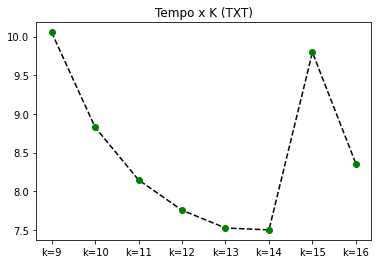

In [124]:
import matplotlib.pyplot as plt
k = ["k=9","k=10","k=11","k=12","k=13","k=14","k=15","k=16"]

plt.title("Tempo x K (TXT)")
plt.plot(k, txt_elapsed_time, 'k--')
plt.plot(k, txt_elapsed_time, 'go')
plt.show()

- Gráfico de Tempo de Processamento x K - Video

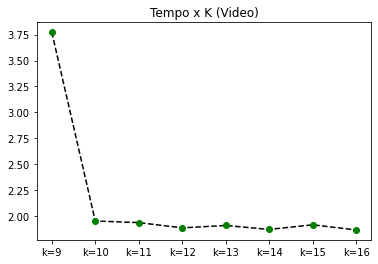

In [ ]:
import matplotlib.pyplot as plt
k = ["k=9","k=10","k=11","k=12","k=13","k=14","k=15","k=16"]

plt.title("Tempo x K (Video)")
plt.plot(k, vid_elapsed_time, 'k--')
plt.plot(k, vid_elapsed_time, 'go')
plt.show()

-  Gráfico de RC x K, com RC = tamArqOriginal / tamArqComprimido


In [ ]:
tamArqCompr = Path('output.lzw').stat().st_size
print(tamArqCompr/1000000,'mb')


6.795533 mb


- RC = tamArqOriginal / ((totalIndices*K)/8)


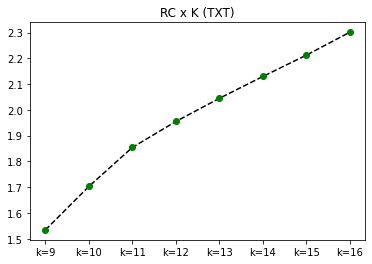

In [118]:
import matplotlib.pyplot as plt
k = ["k=9","k=10","k=11","k=12","k=13","k=14","k=15","k=16"]

plt.title("RC x K (TXT)")
plt.plot(k, txt_RCs, 'k--')
plt.plot(k, txt_RCs, 'go')
plt.show()

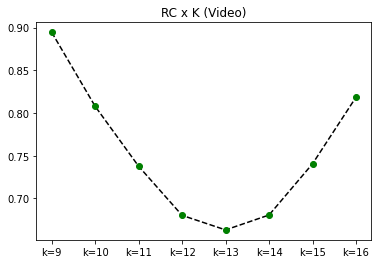

In [ ]:
import matplotlib.pyplot as plt
k = ["k=9","k=10","k=11","k=12","k=13","k=14","k=15","k=16"]

plt.title("RC x K (Video)")
plt.plot(k, vid_RCs, 'k--')
plt.plot(k, vid_RCs, 'go')
plt.show()

# Texto
 - Comparando o arquivo original com os arquivos comprimidos e descomprimidos


In [ ]:
#!hexdump output.lzw
#!!hexdump output.lzw | head

In [ ]:
!diff /content/drive/MyDrive/ITI/corpus16MB.txt corpus_decomp_k\=9.txt
#!diff /content/drive/MyDrive/ITI/corpus16MB.txt corpus_decomp_k\=9.txt | head

A saída de streaming foi truncada nas últimas 5000 linhas.
---
> a penna, como se d'ella devessem escorrer sem cessar coisas humilhadoras! Não se conteve, estendeu a face por sobre a mesa, até o papel:
151093c151093
<        - � Ega, isso n�o � para publicar, pois n�o � verdade?
---
>        - Ó Ega, isso não é para publicar, pois não é verdade?
151097c151097
<        - Talvez n�o... Estou certo que n�o. Naturalmente Carlos, vendo o seu arrependimento, deixa isto esquecido no fundo d'uma gaveta.
---
>        - Talvez não... Estou certo que não. Naturalmente Carlos, vendo o seu arrependimento, deixa isto esquecido no fundo d'uma gaveta.
151099c151099
<        Damaso respirou com allivio. Ah, bem! Isso parecia-lhe mais decente entre amigos! Que l� isso, mostrar o seu arrependimento, at� elle desejava! Com effeito o artigo f�ra uma tolice... Mas ent�o! Em quest�es de mulheres era assim, assomado, um le�o...
---
>        Damaso respirou com allivio. Ah, bem! Isso parecia-lhe mais decente e

In [ ]:
#!diff /content/drive/MyDrive/ITI/corpus16MB.txt corpus_decomp_k\=10.txt
!diff /content/drive/MyDrive/ITI/corpus16MB.txt corpus_decomp_k\=10.txt | head

5c5
< Eu amo a rua. Esse sentimento de natureza toda �ntima n�o vos seria revelado por mim se n�o julgasse, e raz�es n�o tivesse para julgar, que este amor assim absoluto e assim exagerado � partilhado por todos v�s. N�s somos irm�os, n�s nos sentimos parecidos e iguais; nas cidades, nas aldeias, nos povoados, n�o porque soframos, com a dor e os desprazeres, a lei e a pol�cia, mas porque nos une, nivela e agremia o amor da rua. � este mesmo o sentimento imperturb�vel e indissol�vel, o �nico que, como a pr�pria vida, resiste �s idades e �s �pocas. Tudo se transforma, tudo varia � o amor, o �dio, o ego�smo. Hoje � mais amargo o riso, mais dolorosa a ironia, Os s�culos passam, deslizam, levando as coisas f�teis e os acontecimentos not�veis. S� persiste e fica, legado das gera��es cada vez maior, o amor da rua.
---
> Eu amo a rua. Esse sentimento de natureza toda íntima não vos seria revelado por mim se não julgasse, e razões não tivesse para julgar, que este amor assim absoluto e assim ex

In [ ]:
#!diff /content/drive/MyDrive/ITI/corpus16MB.txt corpus_decomp_k\=11.txt
!diff /content/drive/MyDrive/ITI/corpus16MB.txt corpus_decomp_k\=11.txt | head

In [ ]:
#!diff /content/drive/MyDrive/ITI/corpus16MB.txt corpus_decomp_k\=12.txt
!diff /content/drive/MyDrive/ITI/corpus16MB.txt corpus_decomp_k\=12.txt | head

In [ ]:
#!diff /content/drive/MyDrive/ITI/corpus16MB.txt corpus_decomp_k\=13.txt
!diff /content/drive/MyDrive/ITI/corpus16MB.txt corpus_decomp_k\=13.txt | head

In [ ]:
#!diff /content/drive/MyDrive/ITI/corpus16MB.txt corpus_decomp_k\=14.txt
!diff /content/drive/MyDrive/ITI/corpus16MB.txt corpus_decomp_k\=14.txt | head

In [ ]:
#!diff /content/drive/MyDrive/ITI/corpus16MB.txt corpus_decomp_k\=15.txt
!diff /content/drive/MyDrive/ITI/corpus16MB.txt corpus_decomp_k\=15.txt | head

In [ ]:
#!diff /content/drive/MyDrive/ITI/corpus16MB.txt corpus_decomp_k\=16.txt
!diff /content/drive/MyDrive/ITI/corpus16MB.txt corpus_decomp_k\=16.txt | head

# Vídeo
 - Comparando o arquivo original com os arquivos comprimidos e descomprimidos


In [ ]:
#!diff /content/drive/MyDrive/ITI/corpus16MB.txt corpus_decomp_k\=9.txt
!diff /content/drive/MyDrive/ITI/disco.mp4 disco_decomp_k\=9.mp4 | head

Binary files /content/drive/MyDrive/ITI/disco.mp4 and disco_decomp_k=9.mp4 differ
